In [693]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

In [694]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# 1. Загрузка изображения в оттенках серого

In [695]:
image = cv2.imread('sar_1_gray.jpg')

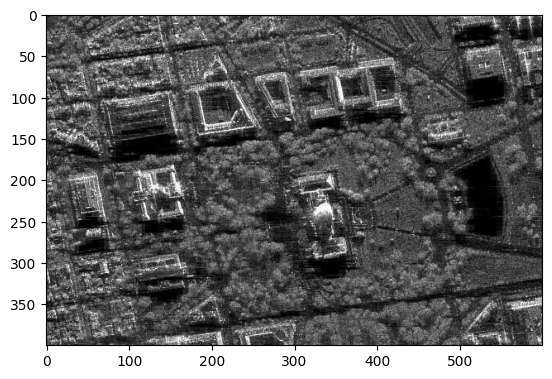

In [696]:
plt.imshow(image)


In [697]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

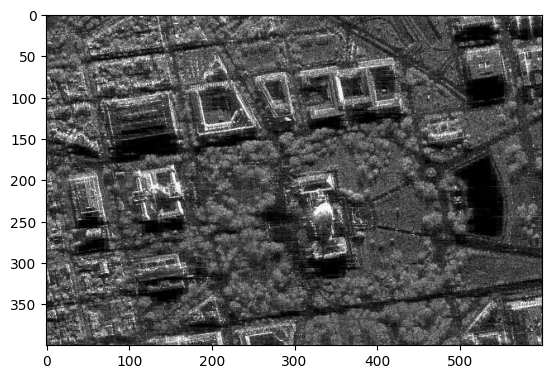

In [698]:
plt.imshow(image_gray, cmap='gray')

# 2. Построение гистограммы

In [699]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

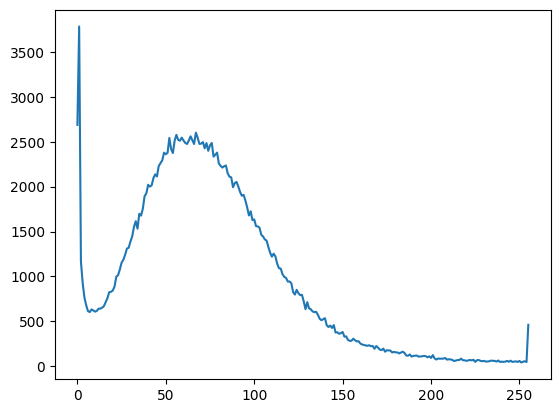

In [700]:
plt.plot(b_hist)

In [701]:
b_hist_cum = b_hist.cumsum()

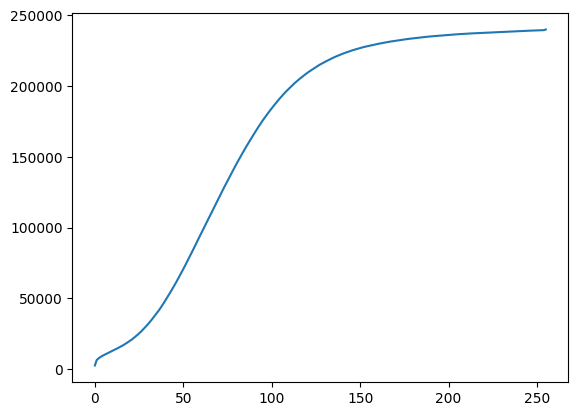

In [702]:
plt.plot(b_hist_cum)

# 3. Реализация алгоритма гамма коррекции с параметром гамма <1, >1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

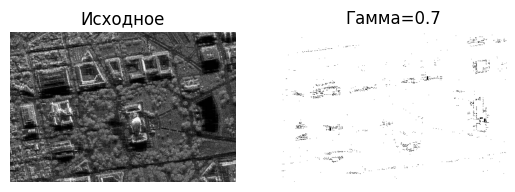

In [703]:
gamma_min = 0.7
out_image_min = 255 * (image/255)**gamma_min

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(out_image_min)
plt.title(f"Гамма={gamma_min}")
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

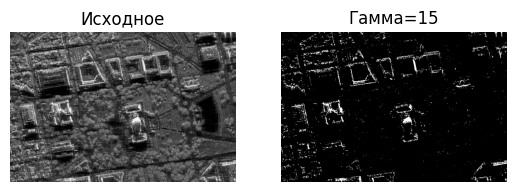

In [704]:
gamma_max = 15
out_image_max = 255 * (image/255)**gamma_max

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(out_image_max)
plt.title(f"Гамма={gamma_max}")
plt.axis('off')

# 4. Сравнение исходного изображения, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [705]:
mse = mean_squared_error(image, out_image_min)
ssim, _ = structural_similarity(image, out_image_min, win_size=3, data_range=255, full=True)

print(f"SSIM: {ssim:}")
print(f"MSE: {mse:}")

SSIM: 0.9003481140612416
MSE: 887.4730569869512


In [706]:
mse = mean_squared_error(image, out_image_max)
ssim, _ = structural_similarity(image, out_image_max, win_size=3, data_range=255, full=True)

print(f"SSIM: {ssim:}")
print(f"MSE: {mse:}")

SSIM: 0.02857475433783222
MSE: 7075.287691258028


# 5. Реализация алгоритма статистической цветокоррекции на основе статистики eq_gray.